# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | presidente medici
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | banda aceh
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | as samawah
Processing Record 13 of Set 1 | tomatlan
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | gaozhou
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | margaret river
Processing Record 22

Processing Record 40 of Set 4 | dailekh
Processing Record 41 of Set 4 | port augusta
Processing Record 42 of Set 4 | tostado
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | wajir
Processing Record 45 of Set 4 | auki
Processing Record 46 of Set 4 | sakakah
Processing Record 47 of Set 4 | tromso
Processing Record 48 of Set 4 | rikaze
Processing Record 49 of Set 4 | totness
Processing Record 0 of Set 5 | georgetown
Processing Record 1 of Set 5 | sturgis
Processing Record 2 of Set 5 | petrozavodsk
Processing Record 3 of Set 5 | sibu
Processing Record 4 of Set 5 | terekli-mekteb
Processing Record 5 of Set 5 | beira
Processing Record 6 of Set 5 | springbok
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | mugia
Processing Record 9 of Set 5 | sao vicente
Processing Record 10 of Set 5 | nishinoomote
Processing Record 11 of Set 5 | aykhal
Processing Record 12 of Set 5 | leh
Processing Record 13 of Set 5 | gorontalo
Processing Record 14 of Set 5 | 

Processing Record 34 of Set 8 | zhicheng
Processing Record 35 of Set 8 | barranca
Processing Record 36 of Set 8 | macapa
Processing Record 37 of Set 8 | armacao de buzios
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | sur
Processing Record 40 of Set 8 | huocheng
City not found. Skipping...
Processing Record 41 of Set 8 | corn island
Processing Record 42 of Set 8 | krasnoshchekovo
Processing Record 43 of Set 8 | coyhaique
Processing Record 44 of Set 8 | mungaa
Processing Record 45 of Set 8 | kindu
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | kayangel
Processing Record 48 of Set 8 | changji
Processing Record 49 of Set 8 | happy valley-goose bay
Processing Record 0 of Set 9 | haiku-pauwela
Processing Record 1 of Set 9 | najran
Processing Record 2 of Set 9 | sao felix do xingu
Processing Record 3 of Set 9 | yarmouth
Processing Record 4 of Set 9 | saraktash
Processing Record 5 of Set 9 | mata-utu
Processing Record 6 of Set 9 | thaba

Processing Record 21 of Set 12 | champerico
Processing Record 22 of Set 12 | paratinga
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | dordrecht
Processing Record 25 of Set 12 | benguela
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | camana
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | bijie
Processing Record 30 of Set 12 | melfort
Processing Record 31 of Set 12 | bhawana
Processing Record 32 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 33 of Set 12 | tayshet
Processing Record 34 of Set 12 | pervomayskoye
Processing Record 35 of Set 12 | angaur state
Processing Record 36 of Set 12 | emerald
Processing Record 37 of Set 12 | san francisco de la paz
Processing Record 38 of Set 12 | verkhniy ufaley
Processing Record 39 of Set 12 | az zulfi
Processing Record 40 of Set 12 | papao
Processing Record 41 of Set 12 | katsuren-haebaru
Processing Record 42 of Set 12 | toliara
Processing Reco

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,23.52,83,75,5.14,ZA,1710270263
1,presidente medici,-11.1753,-61.9014,29.43,79,100,1.36,BR,1710270468
2,grytviken,-54.2811,-36.5092,5.58,81,25,4.03,GS,1710270249
3,bethel,41.3712,-73.4140,16.67,38,0,5.14,US,1710269963
4,enewetak,11.3474,162.3373,26.59,78,100,10.55,MH,1710270255


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,23.52,83,75,5.14,ZA,1710270263
1,presidente medici,-11.1753,-61.9014,29.43,79,100,1.36,BR,1710270468
2,grytviken,-54.2811,-36.5092,5.58,81,25,4.03,GS,1710270249
3,bethel,41.3712,-73.4140,16.67,38,0,5.14,US,1710269963
4,enewetak,11.3474,162.3373,26.59,78,100,10.55,MH,1710270255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

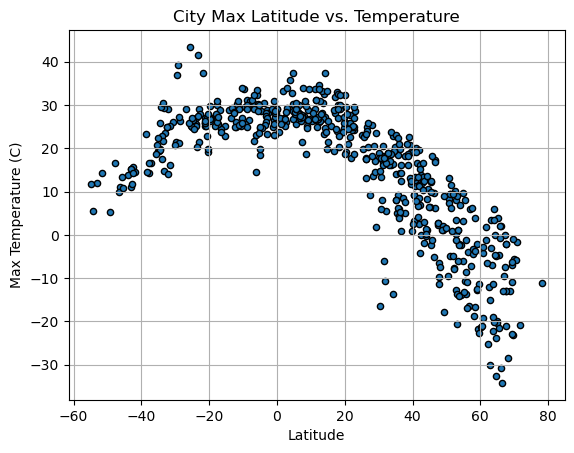

In [55]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

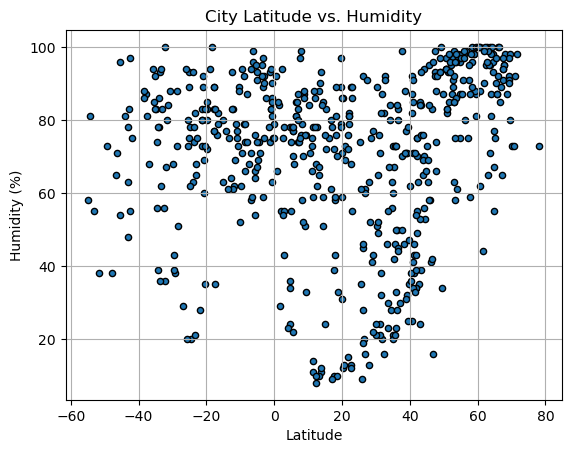

In [56]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

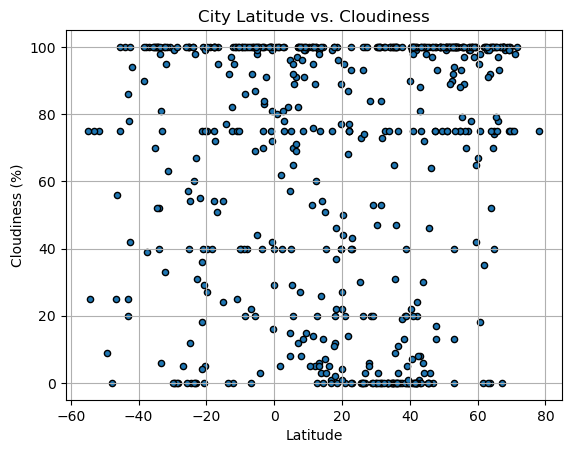

In [57]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Cloudiness", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

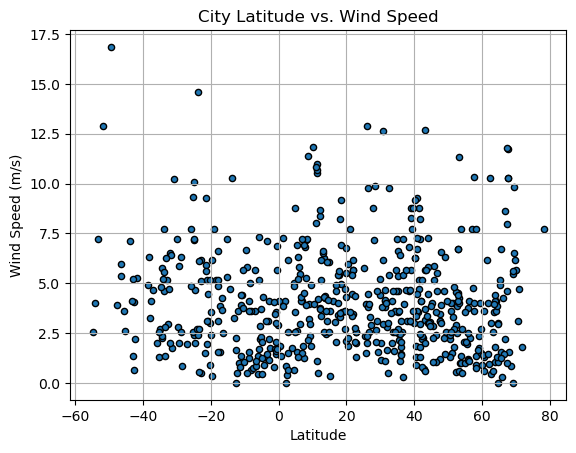

In [58]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Wind Speed", edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values, eq_plot_x, eq_plot_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_plot_x,eq_plot_y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bethel,41.3712,-73.4140,16.67,38,0,5.14,US,1710269963
4,enewetak,11.3474,162.3373,26.59,78,100,10.55,MH,1710270255
5,banda aceh,5.5577,95.3222,25.58,77,70,2.59,ID,1710270469
7,iqaluit,63.7506,-68.5145,-22.15,71,0,1.03,CA,1710270015
9,college,64.8569,-147.8028,-19.96,55,74,1.06,US,1710270002


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,23.52,83,75,5.14,ZA,1710270263
1,presidente medici,-11.1753,-61.9014,29.43,79,100,1.36,BR,1710270468
2,grytviken,-54.2811,-36.5092,5.58,81,25,4.03,GS,1710270249
6,edinburgh of the seven seas,-37.0676,-12.3116,16.50,68,100,4.65,SH,1710270259
8,invercargill,-46.4000,168.3500,11.12,71,56,5.36,NZ,1710270241


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7557884609202357


Text(0, 0.5, 'Max Temp(C)')

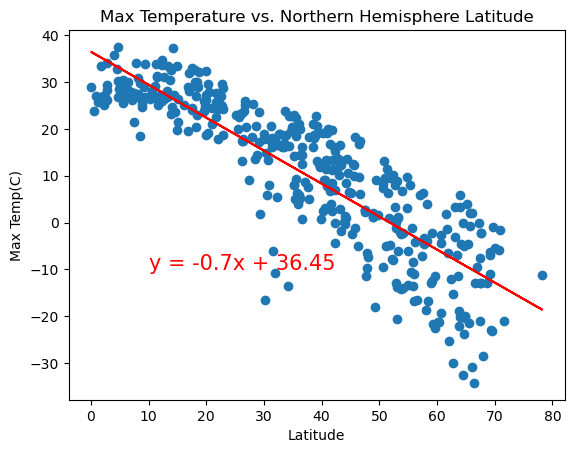

In [62]:
# Linear regression on Northern Hemisphere
x_values= northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
eq_plot_x = 10
eq_plot_y = -10

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Max Temperature vs. Northern Hemisphere Latitude")
plt.ylabel("Max Temp(C)")

The r-squared is: 0.3878161076796963


Text(0, 0.5, 'Max Temp(C)')

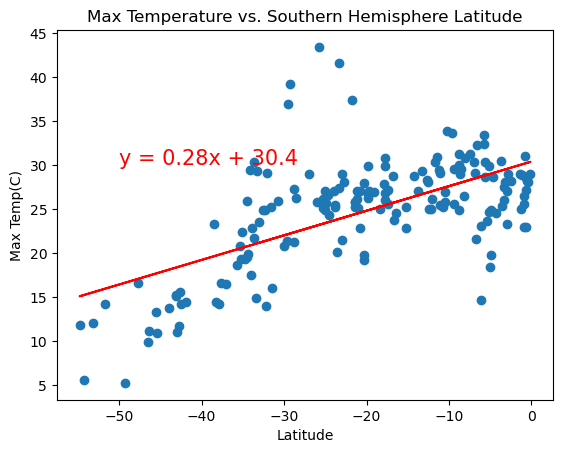

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
eq_plot_x = -50
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Max Temperature vs. Southern Hemisphere Latitude")
plt.ylabel("Max Temp(C)")

**Discussion about the linear relationship:** The maximum temperature appears to rise as one approaches the equator, implying that regions near the equator experience higher maximum temperatures than those farther away from it.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13687380908903168


Text(0, 0.5, 'Humidity (%)')

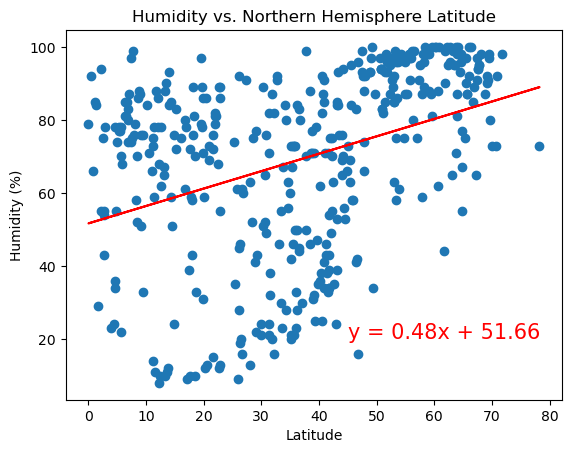

In [64]:
# Northern Hemisphere
x_values= northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
eq_plot_x = 45
eq_plot_y = 20

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Humidity vs. Northern Hemisphere Latitude")
plt.ylabel("Humidity (%)")

The r-squared is: 0.04975662828442762


Text(0, 0.5, 'Humidity (%)')

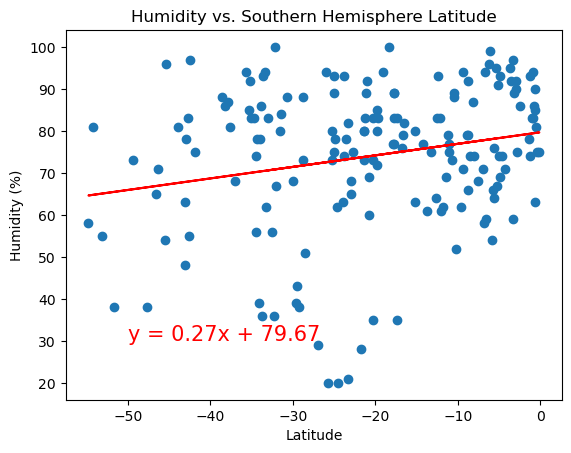

In [65]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
eq_plot_x = -50
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Humidity vs. Southern Hemisphere Latitude")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** There appears to be a limited correlation between hemispheres and humidity levels. Instead, humidity tends to rise with increasing latitude..

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.048758432515442485


Text(0, 0.5, 'Cloudiness (%)')

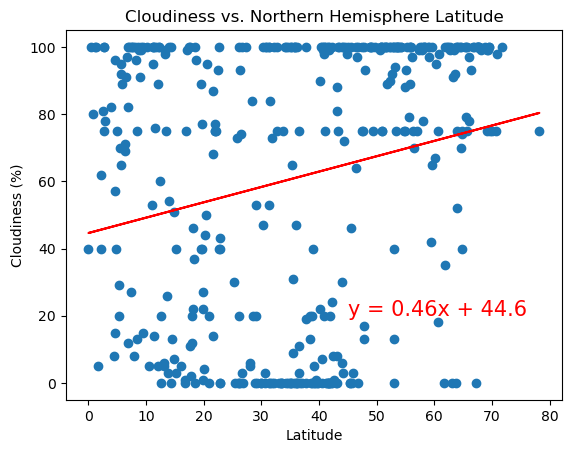

In [66]:
# Northern Hemisphere
x_values= northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
eq_plot_x = 45
eq_plot_y = 20

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Cloudiness vs. Northern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")

The r-squared is: 0.017740722045851254


Text(0, 0.5, 'Cloudiness (%)')

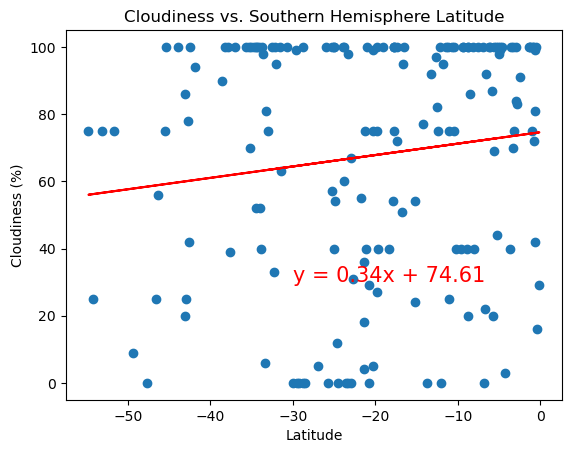

In [67]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
eq_plot_x = -30
eq_plot_y = 30

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Cloudiness vs. Southern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:** It appears that cloud cover increases more rapidly at lower latitudes nearing the equator, but then stabilizes upon reaching the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009754073373950596


Text(0, 0.5, 'Wind Speed (m/s)')

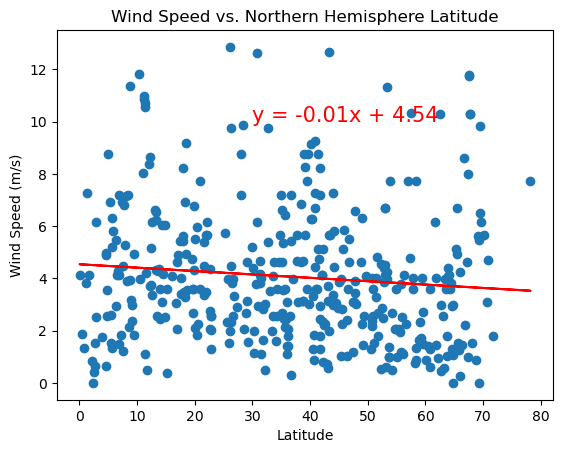

In [68]:
# Northern Hemisphere
x_values= northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
eq_plot_x = 30
eq_plot_y = 10

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Wind Speed vs. Northern Hemisphere Latitude")
plt.ylabel("Wind Speed (m/s)")

The r-squared is: 0.0932337038243765


Text(0, 0.5, 'Wind Speed (m/s)')

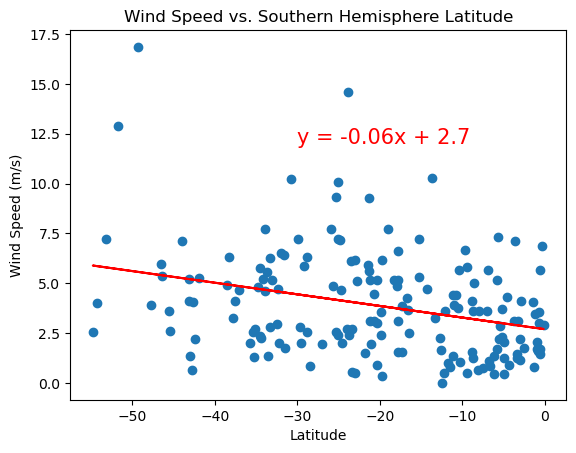

In [69]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
eq_plot_x = -30
eq_plot_y = 12

lin_regress(x_values, y_values, eq_plot_x, eq_plot_y)

plt.title("Wind Speed vs. Southern Hemisphere Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** Wind velocities tend to diminish in the Southern Hemisphere as one approaches the equator, before stabilizing, while in much of the Northern Hemisphere, wind speeds remain relatively consistent.